# Himmelblau 函数的优化

In [1]:
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

import torch

定义 Himmelblau 函数

In [2]:
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

绘制 Himmelblau 函数

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


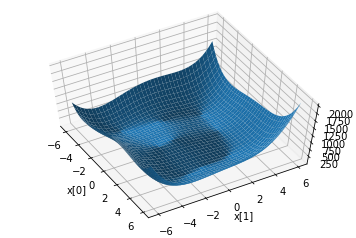

In [3]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
fig.show();

求最小值

In [4]:

x = torch.tensor([0., 0.], requires_grad=True) # 收敛到 (3, 2)
# x = torch.tensor([-1., 0.], requires_grad=True) # 收敛到 (-2.81, 3.13)
# x = torch.tensor([-4., 0..], requires_grad=True) # 收敛到 (-3.78, -3.28)
# x = torch.tensor([4., 0.], requires_grad=True) # 收敛到 (3.58, -1.85)
optimizer = torch.optim.Adam([x,])
for step in range(20001):
    if step:
        optimizer.zero_grad()
        f.backward()
        optimizer.step()
    f = himmelblau(x)
    if step % 1000 == 0:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.tolist(), f))

step 0: x = [0.0, 0.0], f(x) = 170.0
step 1000: x = [1.270142912864685, 1.118398904800415], f(x) = 88.42723083496094
step 2000: x = [2.332378387451172, 1.9535709619522095], f(x) = 13.730920791625977
step 3000: x = [2.8519949913024902, 2.114161729812622], f(x) = 0.6689225435256958
step 4000: x = [2.981964111328125, 2.0271568298339844], f(x) = 0.014858869835734367
step 5000: x = [2.9991261959075928, 2.0014777183532715], f(x) = 3.956971340812743e-05
step 6000: x = [2.999983549118042, 2.0000221729278564], f(x) = 1.1074007488787174e-08
step 7000: x = [2.9999899864196777, 2.000013589859009], f(x) = 4.150251697865315e-09
step 8000: x = [2.9999938011169434, 2.0000083446502686], f(x) = 1.5572823031106964e-09
step 9000: x = [2.9999964237213135, 2.000005006790161], f(x) = 5.256879376247525e-10
step 10000: x = [2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step 11000: x = [2.9999988079071045, 2.0000014305114746], f(x) = 5.547917680814862e-11
step 12000: x = [2.99999928474426

求极大值

In [5]:
x = torch.tensor([0., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x,])
for step in range(20001):
    if step:
        optimizer.zero_grad()
        (-f).backward()
        optimizer.step()
    f = himmelblau(x)
    if step % 1000 == 0:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.tolist(), f))

step 0: x = [0.0, 0.0], f(x) = 170.0
step 1000: x = [-0.29735857248306274, -0.6907159686088562], f(x) = 181.12930297851562
step 2000: x = [-0.27394047379493713, -0.897539496421814], f(x) = 181.61114501953125
step 3000: x = [-0.270916223526001, -0.9224520921707153], f(x) = 181.61651611328125
step 4000: x = [-0.2708452045917511, -0.9230348467826843], f(x) = 181.6165313720703
step 5000: x = [-0.270844966173172, -0.9230363368988037], f(x) = 181.61651611328125
step 6000: x = [-0.27084478735923767, -0.9230372309684753], f(x) = 181.61651611328125
step 7000: x = [-0.2708446979522705, -0.9230377078056335], f(x) = 181.61651611328125
step 8000: x = [-0.2708446681499481, -0.9230380058288574], f(x) = 181.61651611328125
step 9000: x = [-0.27084463834762573, -0.9230383038520813], f(x) = 181.6165313720703
step 10000: x = [-0.27084460854530334, -0.9230384230613708], f(x) = 181.6165313720703
step 11000: x = [-0.27084457874298096, -0.9230386018753052], f(x) = 181.61651611328125
step 12000: x = [-0.270844